In [ ]:
import typing 
import collections
import heapq
from typing import List
from collections import defaultdict, Counter

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        max_profit = 0
        l = 0
        r = 1
        while r<len(prices):

            if prices[l]<prices[r]:
                x = prices[r]-prices[l]
                max_profit = max(x,max_profit)
            else:
                l = r
            r = r+1
        return max_profit

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        max_value = 0
        min1 = prices[0]
        for i in range(len(prices)):
            min1 = min(min1, prices[i])
            max_value = max(prices[i] - min1, max_value)
        return max_value

In [ ]:
###TLE###
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        max_value = 0
        for i in range(len(prices)):
            max_value = max(max(prices[i:])- prices[i], max_value)

        return max_value

In [ ]:
class Solution:
    def containsNearbyDuplicate(self, nums: List[int], k: int) -> bool:
        """"
        219. Contains Duplicate II
        Given an array of integers `nums` and an integer `k`, return `true` _if there are two distinct indices `i` and `j` in the array_ such that_ `nums[i] == nums[j]` and the absolute difference between_ `i` and `j` _is less than or equal to_ `k`.
        >> Using two pointers (l, r) and a set() for tracking unique elements in the window.
        #! Time Complexity is : O(n) where n is the length of string
        #! Space Complexity is : O(k)     

        """

        l = 0
        setcheck = set()
        for r in range(len(nums)):
            if r-l>k:
                setcheck.remove(nums[l])
                l+=1

            if nums[r] in setcheck:
                return True
            setcheck.add(nums[r])

        return False

In [ ]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        """"
        Given a string `s`, find the length of the longest substring without repeating characters.

        >> Sliding window + For Loop for each character + set() to check condition
        >> craeted a for to got for each letter and check till using while loop if window is value using that character exitistens in set() 

        #! Time Compliexity is : O(n) where n is the length of string
        ----------------------------------------------------------------------------------------------
        #! Space Complexity is : O(min(m, n)) where m is the length of string and n is the number of unique characters in string
        # This solution is optimal as it has linear time complexity and constant space complexity.
        # It uses two pointers (l, r) to keep track of the current substring.
        # The set() is used to keep track of the characters in the current substring.
        # The while loop continues as long as the current character is in the set().
        # When the current character is not in the set(), it is added to the set() and the length of the current substring is updated.
        # The maximum length of the substring is stored in the variable res.
        # Finally, the length of the longest substring without repeating characters is returned.

        Examples:
        >>> Solution().lengthOfLongestSubstring('abcabcbb')
        3
        >>> Solution().lengthOfLongestSubstring('bbbbb')
        1
        >>> Solution().lengthOfLongestSubstring('pwwkew')
        3
        >>> Solution().lengthOfLongestSubstring('')
        ----------------------------------------------------------------------------------------------

         
        """
        out = set()
        l =0 
        res = 0
        for r in range(len(s)):
            while s[r] in out:
                # this is window for we are removing duplicates from this
                out.remove(s[l])
                l += 1
            
            out.add(s[r])
            res = max(r-l+1, res)

        return res

In [ ]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        """"
        Given a string `s`, find the length of the longest substring without repeating characters.
        >> Sliding window + For Loop for each character + set() to check condition + left to right changing variable
        
        #! Time Compliexity is : O(n) where n is the length of string
        
        """
        count = 0
        result = 0
        Substring = set()
        for i in range(len(s)):
            l = i
            # used opptosite condition to 
            while (s[l] not in Substring) and l < len(s) - 1:
                Substring.add(s[l])
                l+=1
            
            result = max(result, len(Substring))
            Substring = set()
        return result


hashmap + sliding window ocnstraint of k value

In [ ]:
class Solution:
    def characterReplacement(self, s: str, k: int) -> int:
        """"
        
        Given a string `s` and an integer `k`, return the length of the longest substring of `s` that contains no repeating characters and has a length greater than or equal to `k`.
        >> using hashmap to store charcter and movement of l if when this formula( window size - maxfreq string > k) and check the max value of window size
        #! Time Complexity is O(n) where n is the length of string
        ----------------------------------------------------------------------
        It uses a hashmap has to track the frequency of characters in the current substring. 
        The left pointer l of the sliding window is adjusted to maintain the condition of having no more than k non-repeating characters. 
        The maximum length of the substring res is updated as the algorithm iterates through the characters of s.
        ----------------------------------------------------------------------
        #! Space Complexity is O(min(m, n)) where m is the length of string and n is the number of unique characters in string
        """

        has = {}
        res = 0
        l=0
        for r in range(len(s)):
            has[s[r]] = 1 + has.get(s[r], 0)

            while ((r-l+1) - max(has.values()) > k):
                has[s[l]] -=1
                l+=1

            res = max(res, r-l+1)
        return res

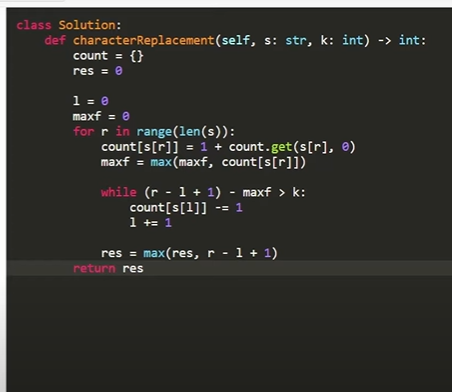

In [ ]:
##### MISTAKE ##### 
# its a half correct code for some test cases only, the solutions mention abve is better and reverse of this below implemnted case

class Solution:
    def characterReplacement(self, s: str, k: int) -> int:
        has = {}
        l = 0
        r = 0
        res = 0
        while r<len(s)-1:
            has[s[r]] =1 + has.get(s[r], 0)
            r+=1
            while ((r-l+1) - max(has.values()) <= k) and r<len(s)-1:
                
                has[s[r]] = 1 + has.get(s[r], 0)
                res = max(res, r-l+1)
                print(f'l:{s[l:r+1]}, r:{r}, res{res}')
                print(has)
                r+=1
                
            l+=1
            has[s[l-1]] = has.get(s[l-1]) -1
            print('--------')
            print(has)
        return res +1

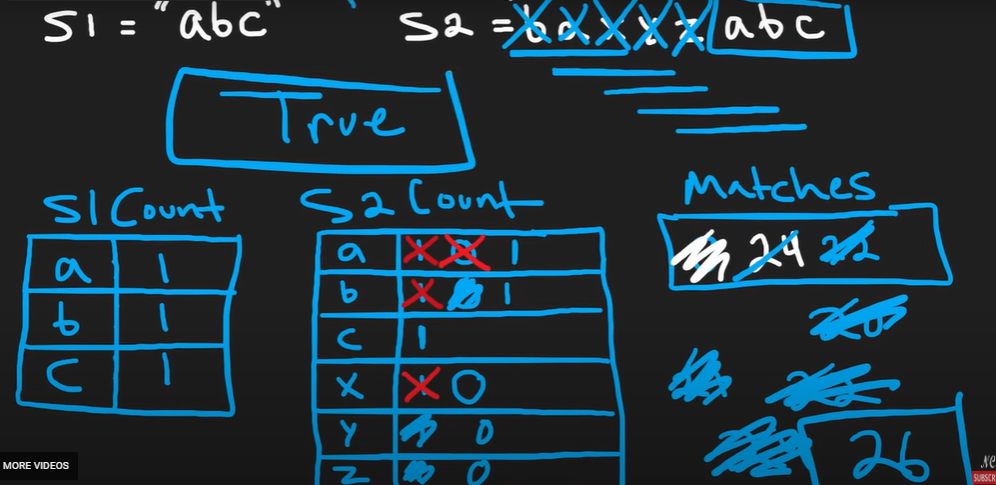

In [ ]:
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:

        """"
        
        Given two strings `s1` and `s2`, return `true` _if_ `s2` _contains a permutation of_ `s1` _in_ `s2`, _otherwise_ `false`.
        >> 
        #! The time complexity of this solution is O(n) where n is the length of string.
        ------------------------------------------------------------------------------------------
        1. Initialize two frequency arrays `has1` and `has2` of size 26 to store character frequencies.
        2. Compare frequencies of `s1` and first `len(s1)` characters of `s2` and store matches in `totalmatch`.
        3. Slide the window to the right by incrementing `r` and update `totalmatch` based on frequency changes.
        4. If `totalmatch` equals 26, return True. Otherwise, continue sliding the window.
        5. Return True if `totalmatch` equals 26 after sliding the entire window.
        #! The space complexity is O(1) as we are using constant space.
        """
        if len(s1)>len(s2): return False
        has1 = [0]*26
        has2 = [0]*26

        #only checked for first time of len(s1)
        for i in range(len(s1)):
            has1[ord(s1[i]) - ord('a')] += 1
            has2[ord(s2[i]) - ord('a')] += 1
        
        # fill the matches when its reach 26 means we got our answer
        totalmatch = 0 
        for i in range(26):
            if has1[i] == has2[i]:
                totalmatch += 1
            
        # now start with sliding window
        l = 0
        for r in range(len(s1), len(s2)):
            if totalmatch == 26:
                return True

            #for movement of r and totalmatch update
            has2[ord(s2[r]) - ord('a')] +=1
            if has1[ord(s2[r]) - ord('a')] == has2[ord(s2[r]) - ord('a')]:
                totalmatch +=1
            elif has1[ord(s2[r]) - ord('a')] +1 == has2[ord(s2[r]) - ord('a')]:
                totalmatch -=1
            
            # for movement of l and totalmatch update
            has2[ord(s2[l]) - ord('a')] -=1
            if has1[ord(s2[l]) - ord('a')] == has2[ord(s2[l])-ord('a')]:
                totalmatch +=1
            elif has1[ord(s2[l]) - ord('a')] -1 == has2[ord(s2[l]) - ord('a')]:
                totalmatch -=1
            l +=1
        return totalmatch == 26


In [ ]:
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        """"
        
        Given two strings `s1` and `s2`, return `true` _if_ `s2` _contains a **permutation** of_ `s1`, _otherwise, return_ `false`.
        

        > used s2 hashmap and submap for the s1 of len(s1) and compared it 
        #! Time Complexity is : O(n) where n is the length of string
        #! space complexity of the given code is O(n)
        """
        has1 = Counter(s1)
        r= len(s1)
        hasub2 = {}
        while r<len(s2)+1:
            l = r - len(s1) 
            # print(s2[l:r])
            hasub2 = Counter(s2[l:r])
            if has1 == hasub2:
                return True
            r+=1
            # print(has1)
            # print(hasub2)
        return False
            

In [ ]:
class Solution:
    def numberOfAlternatingGroups(self, colors: List[int], k: int) -> int:
        """"
        Count the number of k-length contiguous groups of alternating red (0) and blue(1) tiles in a circular arrangement.
        #! TC: O(n+k)
        ---------------------------------------------------------
        Firstly Flatten Circular By Appending K-1 Elements To The End
        Run For Loop & Keep Check Of Alternating Pattern 0 1 0 1 0 1 0 1 0 1..
        Length len If This Pattern Occurs For More Than K len >=K Increase Count !!
        ---------------------------------------------------------

        """
        count= 0
        window = 1
        colors+=colors[:k-1]
        for i in range(1, len(colors)):
            if colors[i] != colors[i-1]:
                window+=1
            else:
                window=1
            if window>=k:
                count+=1
        return count